## 1 часть. Исследование связанное с входными данными.


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
from matplotlib.colors import ListedColormap
import nn
random.seed(42)

In [7]:
def view_split(X, y, predictor, title='split on 3 class'):
    plt.figure(figsize=(8,5))
    plt.title(title)

    eps = 0.1
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                        np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
    Z = predictor(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
    return Z

## Create data

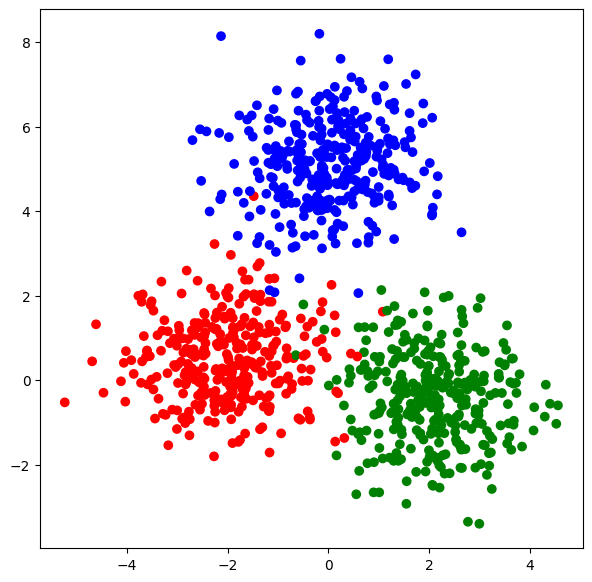

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5], [0,5]], cluster_std=1, random_state=42)

colors = ("red", "green", 'blue')
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1,2]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()


label_bin = {
    0:np.array([1,0,0]),
    1:np.array([0,1,0]),
    2:np.array([0,0,1])
}

y_labels = np.array([label_bin.get(label) for label in y])

# Create Network

In [13]:
net  = nn.Network()

# Train

epoch 1, MSE: 0.33003130810340914
epoch 101, MSE: 0.06347199648875966
epoch 201, MSE: 0.026275508657409814
epoch 301, MSE: 0.0216117232122662
epoch 401, MSE: 0.019885312219616254
epoch 501, MSE: 0.01883735750320659
epoch 601, MSE: 0.018045075051425944
epoch 701, MSE: 0.017399715060239757
epoch 801, MSE: 0.016880915223982076
epoch 901, MSE: 0.01647857792312005


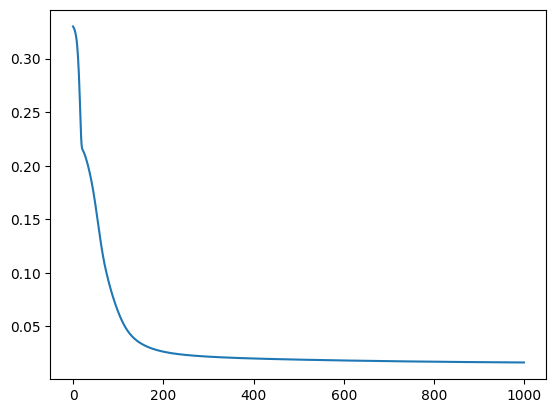

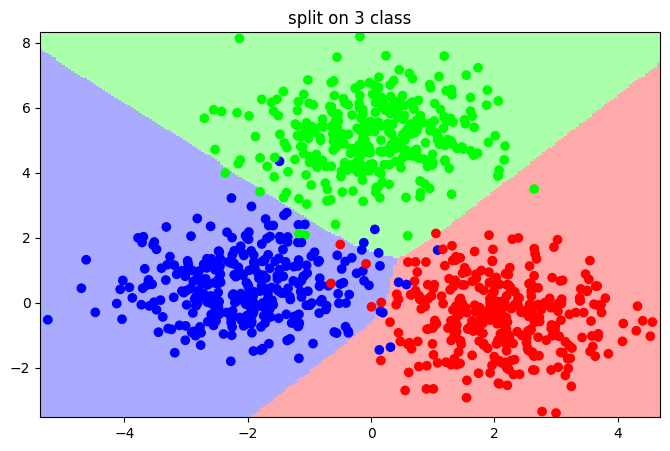

In [14]:
hist = net.fit(X, y_labels, 1000, 0.1)
plt.plot(hist)
_=view_split(X, y, net.predict)